In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np


In [4]:
data_path = [
    './plot_cifar_1/1_cifar10_FedBN_64_10_0.01_0.01_5c_600r.h5',
    './plot_cifar_3/3_cifar10_FedBN_64_10_0.01_0.01_5c_600r.h5',
    './plot_cifar_5/5_cifar10_FedBN_64_10_0.01_0.01_5c_600r.h5'    
]
# label = ['FedAvg', 'Per-FedAvg(0.01)', 'Per-FedAvg(0.005)', 'pFedInit']
label = ['CIFAR-1', 'CIFAR-3','CIFAR-5']

colors = ['#1B1A17', '#0F4C75', '#E45826', '#E6D5B8']

markers = ['x', 'o', 'P']

-7.608744518793349e-05
0.0025040170403993426
0.020303733737475203


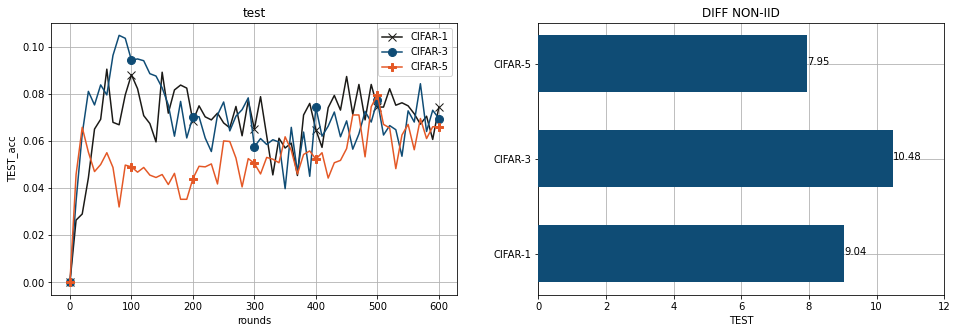

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))


max_testacc = []

for path, lab, col, mk in zip(data_path, label, colors, markers):
    data = h5py.File(path, 'r')
    losses = data['rs_train_loss'][::]
    train_acc = data['rs_train_acc'][::]
    test_acc = data['rs_glob_acc'][::]

    print(np.mean(train_acc-test_acc))
    max_testacc.append(np.round(np.max(test_acc)*100, decimals=2))
    
    x = [i*10 for i in range(len(losses+1))]

    ax1.plot(x, test_acc, label = lab, color=col, marker=mk, markevery=10, markersize=8)
    # ax2.plot(x, losses, label = lab, color=col)
    # plt.plot(train_acc, label = 'train_acc')


ax1.set_xlabel("rounds")
ax1.set_ylabel("TEST_acc")
ax1.set_title('test')

ax2.set_xlim(0.0, 12)
ax2.barh(range(len(data_path)), max_testacc, height=0.6, color='#0F4C75', zorder=10)
ax2.set_yticks(range(len(data_path)), label)
ax2.set_xlabel("TEST")
ax2.set_title("DIFF NON-IID")

for x, y in enumerate(max_testacc):
    ax2.text(y + 0.001, x-0.01, '%s' % (y))


ax1.grid()
ax1.legend()
ax2.grid(zorder=0)
plt.savefig('cifar_fedbn.pdf', dpi=600, pad_inches = 0)

In [ ]:
data_path = [
    'cifar10(1)_FedAvg_64_10_0.01_0.005_5c_600r.h5',
    'cifar10(3)_FedAvg_64_10_0.01_0.005_5c_600r.h5',
    'cifar10(5)_FedAvg_64_10_0.01_0.005_5c_600r.h5',

    'cifar10(1)_PerAvg_64_10_0.01_0.005_5c_600r.h5',
    'cifar10(3)_PerAvg_64_10_0.01_0.005_5c_600r.h5',
    'cifar10(5)_PerAvg_64_10_0.01_0.005_5c_600r.h5',

    'cifar10(1)_pFedInit_64_10_0.01_0.005_5c_600r.h5',
    'cifar10(3)_pFedInit_64_10_0.01_0.005_5c_600r.h5',
    'cifar10(5)_pFedInit_64_10_0.01_0.005_5c_600r.h5',
]
# label = ['FedAvg', 'Per-FedAvg(0.01)', 'Per-FedAvg(0.005)', 'pFedInit']
label = ['FedAvg-1', 'FedAvg-3','FedAvg-5', 'Per-FedAvg-1', 'Per-FedAvg-3','Per-FedAvg-5', 'pFedInit-1', 'pFedInit-3','pFedInit-5']

colors = ['#1B1A17', '#0F4C75', '#E45826', '#1B1A17', '#0F4C75', '#0F4C75', '#1B1A17', '#0F4C75', '#1B1A17',]

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))


max_testacc = []
temp_max_acc = []
cnt = 1
width = 0.2

diff_train_test = []
temp_diff_train_test = []

for path, lab, col in zip(data_path, label, colors):
    data = h5py.File(path, 'r')
    losses = data['rs_train_loss'][::]
    train_acc = data['rs_train_acc'][::]
    test_acc = data['rs_glob_acc'][::]


    temp_max_acc.append(np.max(test_acc))

    temp_diff_train_test.append(np.abs(np.mean(train_acc-test_acc)))

    if cnt % 3 == 0:
        max_testacc.append(temp_max_acc)
        diff_train_test.append(temp_diff_train_test)
        temp_diff_train_test = []
        temp_max_acc = []

    cnt += 1

x_list = [
    [1, 2, 3],
    [1+width, 2+width, 3+width],
    [1+width*2, 2+width*2, 3+width*2],
]

labels = ['CIFAR-1', 'CIFAR-3', 'CIFAR-5']
algo_name = ['FedAvg', 'Per-FedAvg', 'pFedInit']
mks = ['o', 's', 'v']
for i in range(3):
    ax1.bar(x_list[i], max_testacc[i], width=width, align='edge', tick_label=labels, color=colors[i], zorder=10, label=algo_name[i])

    ax2.plot(diff_train_test[i], color=colors[i], label=algo_name[i], marker=mks[i], markersize=12, mfc='none', linewidth=3.0)

ax2.set_xticks([0, 1, 2], labels)
ax1.set_xlabel("rounds")
ax1.set_ylabel("TEST_acc")
ax1.set_title('test')

ax1.grid(zorder=0)
ax2.grid()
ax1.legend()
ax2.legend()
plt.savefig('acc_comp.pdf', dpi=600)


In [2]:
data_path = [
    'femnist(niid)_FedAvg_16_5_0.003_0.001_10c_1200r.h5',
    'femnist(niid)_PerAvg_16_5_0.003_0.001_10c_1200r.h5',
    'femnist(niid)_pFedInit_16_5_0.003_0.001_10c_1200r.h5'
]

colors = ['#1B1A17', '#0F4C75', '#E45826', '#1B1A17', '#0F4C75', '#0F4C75', '#1B1A17', '#0F4C75', '#1B1A17',]

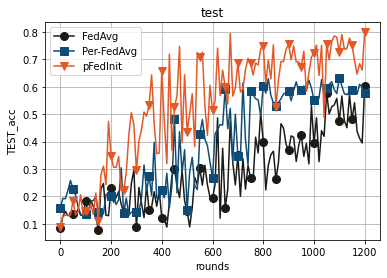

In [4]:

max_testacc = []
temp_max_acc = []
cnt = 1
width = 0.2

diff_train_test = []
temp_diff_train_test = []

labels = ['FedAvg', 'Per-FedAvg', 'pFedInit']
algo_name = ['FedAvg', 'Per-FedAvg', 'pFedInit']
mks = ['o', 's', 'v']

for path, lab, col, mk in zip(data_path, labels, colors, mks):
    data = h5py.File(path, 'r')
    losses = data['rs_train_loss'][::]
    train_acc = data['rs_train_acc'][::]
    test_acc = data['rs_glob_acc'][::]

    max_testacc.append(np.max(test_acc))

    x = [i*10 for i in range(len(losses+1))]
    plt.plot(x, test_acc, label = lab, color = col, markevery = 5, marker=mk, markersize=8)

# x_list = [
#     [1, 2, 3],
#     [1+width, 2+width, 3+width],
#     [1+width*2, 2+width*2, 3+width*2],
# ]

# ax1.bar(x_list[0], max_testacc, width=width, align='center', tick_label=labels, color=colors[1], zorder=10, label=algo_name[0])

plt.xlabel("rounds")
plt.ylabel("TEST_acc")
plt.title('test')

plt.grid(zorder=0)
# ax2.grid()
# ax2.legend()
plt.legend()
plt.savefig('femnist_acc_niid_comp.pdf', dpi=600)


In [1]:
import hub
from torchvision import datasets, transforms, models
ds = hub.load('hub://activeloop/office-home-domain-adaptation')

Opening dataset in read-only mode as you don't have write permissions.
hub://activeloop/office-home-domain-adaptation loaded successfully.
This dataset can be visualized at https://app.activeloop.ai/activeloop/office-home-domain-adaptation.


In [2]:
dataloader = ds.pytorch(num_workers = 2, batch_size= 4, shuffle = False)

In [5]:
s = set()

for data in dataloader:
    print(data['labels'])

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/hjm/miniconda3/envs/torch/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/hjm/miniconda3/envs/torch/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 40, in fetch
    return self.collate_fn(data)
  File "/home/hjm/miniconda3/envs/torch/lib/python3.9/site-packages/hub/integrations/pytorch/common.py", line 12, in collate_fn
    return IterableOrderedDict(
  File "/home/hjm/miniconda3/envs/torch/lib/python3.9/site-packages/hub/integrations/pytorch/common.py", line 13, in <genexpr>
    (key, collate_fn([d[key] for d in batch])) for key in elem.keys()
  File "/home/hjm/miniconda3/envs/torch/lib/python3.9/site-packages/hub/integrations/pytorch/common.py", line 18, in collate_fn
    return torch.utils.data._utils.collate.default_collate(batch)
  File "/home/hjm/miniconda3/envs/torch/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 146, in default_collate
    return default_collate([torch.as_tensor(b) for b in batch])
  File "/home/hjm/miniconda3/envs/torch/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 138, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: stack expects each tensor to be equal size, but got [480, 640, 3] at entry 0 and [362, 600, 3] at entry 1
